In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

In [2]:
res = np.loadtxt("res_diff.txt")

print(res.shape)

time = 9

res = res.reshape((time+1, 1000, 256))

(10000, 256)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


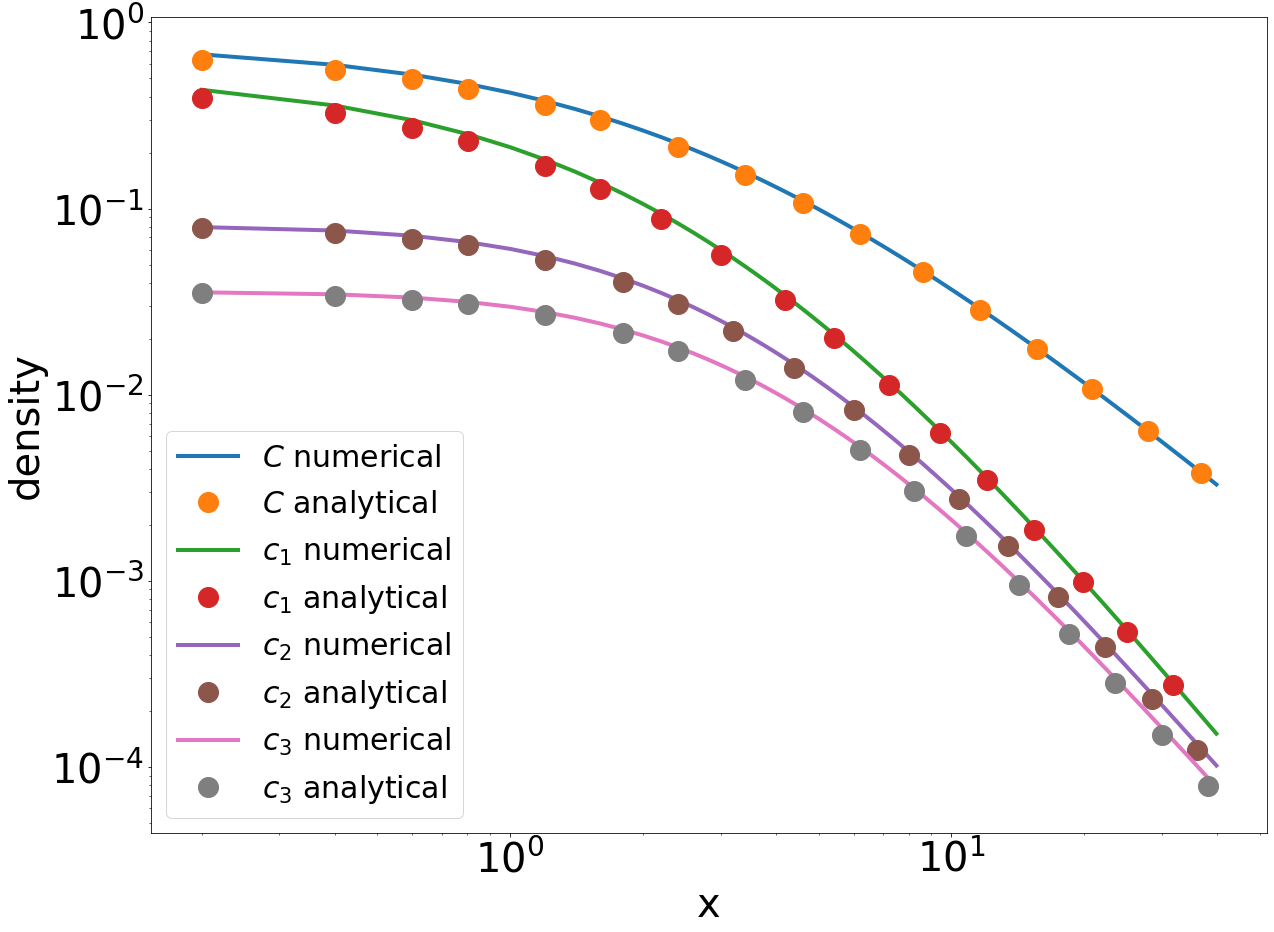

In [3]:
J = 1.0
x = np.linspace(0.0, 200, 1000)
l = (24.0/J)**(1./3.)



lasty = -800
firsty = 1
def formula(l, k, x):
    return 12*l/gamma(1./3.)*k**(-2./3.)*np.power(x,-3)
    

plt.figure(figsize=(20,15))
plt.plot(x[firsty:lasty], res[time][firsty:lasty].sum(axis=1), label='$C$ numerical', lw=4)
plt.plot(x[firsty:lasty], (6. / (x + l)**2)[firsty:lasty], 'o', label='$C$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 0], label='$c_1$ numerical', lw=4)
plt.plot(x[firsty:lasty], (4.*l / (x + l)**3) [firsty:lasty], 'o', label = '$c_1$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 1], label='$c_2$ numerical', lw=4)
plt.plot(x[firsty:lasty], ((8./3.*l / (x + l)**3)- 2.*l*l/(x+l)**4)[firsty:lasty], 'o', label = '$c_2$ analytical', lw=4, markersize=20, markevery=0.05)

plt.plot(x[firsty:lasty], res[time][firsty:lasty, 2], label='$c_3$ numerical', lw=4)
plt.plot(x[firsty:lasty], ((56./27.*l / (x + l)**3) - 8./3.*l*l/(x+l)**4 + 8./9.*l*l*l/(x+l)**5)[firsty:lasty], 'o', label = '$c_3$ analytical', lw=4, markersize=20, markevery=0.05)

#plt.title("Steady state solution of Diffusion-Coagulation system", fontsize=30)
plt.xticks(fontsize=40)
ax = plt.gca()
ax.tick_params(axis='both', which='minor', labelsize=40)
plt.xlabel("x", fontsize=40)
plt.xscale('log')
plt.yticks(fontsize=40)
plt.ylabel("density", fontsize=40)
plt.yscale('log')
plt.legend(fontsize=30)
plt.savefig("Fig1.eps", format='eps')

In [4]:
res = np.loadtxt("res_ballistic.txt")

print(res.shape)

n = 256
t = 11
num=t
res = res.reshape((t+1, 5000, n))

(60000, 256)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


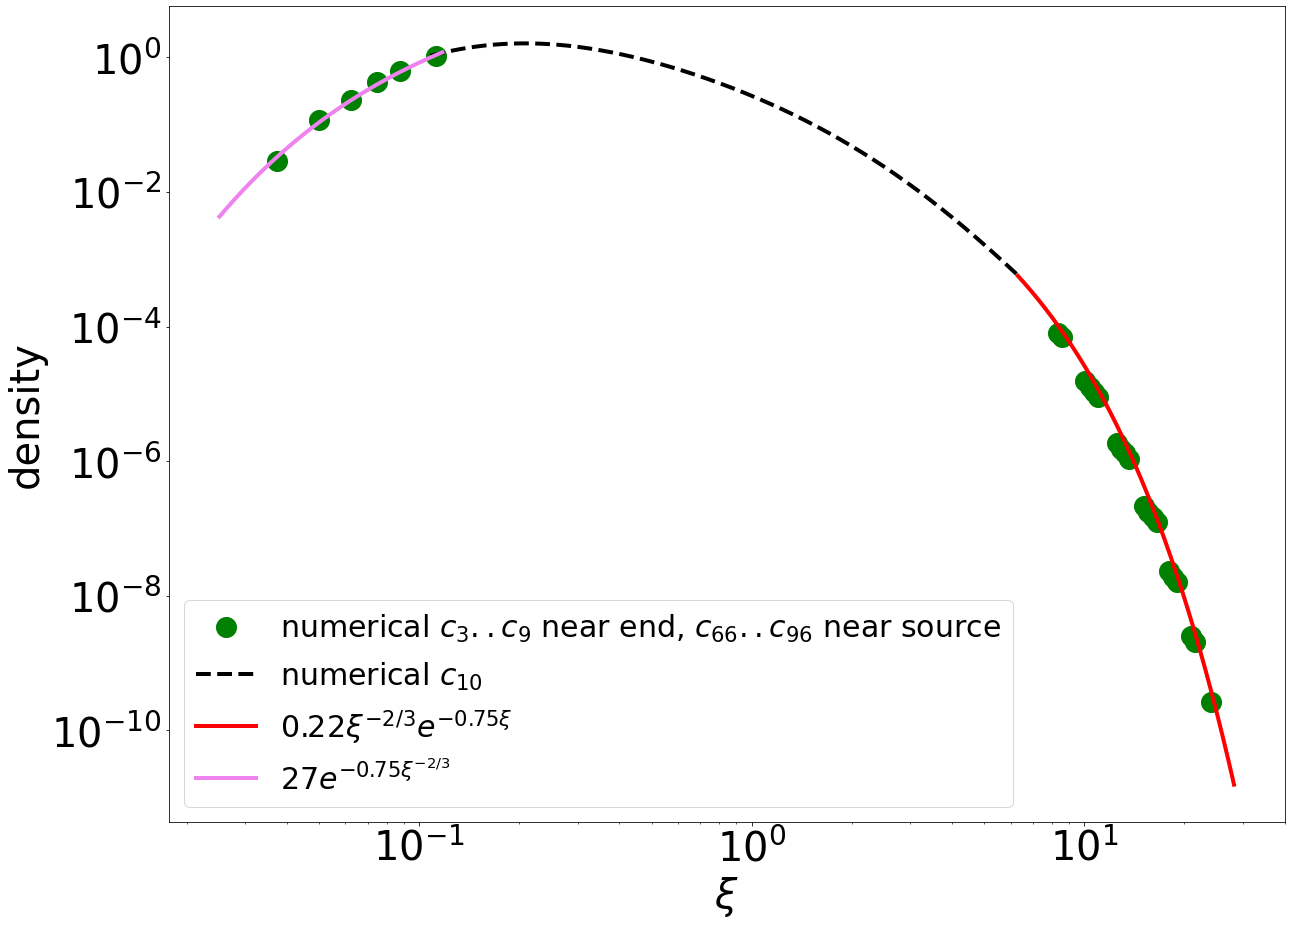

In [5]:
J = 1.0
V = 1.0
K = 1.0
x = np.linspace(0.000000001, 100, 5000)

time = t

lasty = -500
mid_l = 4000

mid_f = 500
firsty = 200

plt.figure(figsize=(20,15))

plt.plot(3/x[mid_l:lasty], res[time][mid_l:lasty, 2]/np.power(x[mid_l:lasty], -8./3.), 'go', label='numerical $c_{3}..c_{9}$ near end, $c_{66}..c_{96}$ near source', lw=4, markersize=20, markevery=0.02)
plt.plot(4/x[mid_l:lasty], res[time][mid_l:lasty, 3]/np.power(x[mid_l:lasty], -8./3.), 'go', lw=4, markersize=20, markevery=0.02)
plt.plot(5/x[mid_l:lasty], res[time][mid_l:lasty, 4]/np.power(x[mid_l:lasty], -8./3.), 'go', lw=4, markersize=20, markevery=0.02)
plt.plot(6/x[mid_l:lasty], res[time][mid_l:lasty, 5]/np.power(x[mid_l:lasty], -8./3.), 'go', lw=4, markersize=20, markevery=0.02)
plt.plot(7/x[mid_l:lasty], res[time][mid_l:lasty, 6]/np.power(x[mid_l:lasty], -8./3.), 'go', lw=4, markersize=20, markevery=0.02)
plt.plot(9/x[mid_l:lasty], res[time][mid_l:lasty, 8]/np.power(x[mid_l:lasty], -8./3.), 'go', lw=4, markersize=20, markevery=0.02)

plt.plot(10/x[80:-300], res[time][80:-300, 9]/np.power(x[80:-300], -8./3.), 'k--', lw=4, label='numerical $c_{10}$')#, lw=4, markersize=20, markevery=0.02)

plt.plot(66/x[firsty:mid_f], res[time][firsty:mid_f, 65]/np.power(x[firsty:mid_f], -8./3.), 'go', lw=4, markersize=20, markevery=0.05)
plt.plot(76/x[firsty:mid_f], res[time][firsty:mid_f, 75]/np.power(x[firsty:mid_f], -8./3.), 'go', lw=4, markersize=20, markevery=0.05)
plt.plot(86/x[firsty:mid_f], res[time][firsty:mid_f, 85]/np.power(x[firsty:mid_f], -8./3.), 'go', lw=4, markersize=20, markevery=0.05)
plt.plot(96/x[firsty:mid_f], res[time][firsty:mid_f, 95]/np.power(x[firsty:mid_f], -8./3.), 'go', lw=4, markersize=20, markevery=0.05)

line_x2 = np.logspace(-1.6, -0.93, 1000)

line_x = np.logspace(0.8, 1.45, 1000)

sc1 = 0.75
sc2 = 0.75
coef1 = 0.22
coef2 = 27.0

line = np.power(line_x, -2./3.)*np.exp(-sc1*line_x) * coef1

line2 = np.exp(-sc2*np.power(line_x2, -2./3.)) * coef2


plt.plot(line_x, line, lw=4, color='red', label= "$0.22 \\xi^{-2/3}e^{-0.75\\xi}$")
plt.plot(line_x2, line2, lw=4, color='violet', label="$27 e^{-0.75\\xi^{-2/3}}$")

plt.xticks(fontsize=40)
ax = plt.gca()
ax.tick_params(axis='both', which='minor', labelsize=40)
plt.xlabel("$\\xi$", fontsize=40)
plt.xscale('log')
plt.yticks(fontsize=40)
plt.ylabel("density", fontsize=40)
plt.yscale('log')
plt.legend(fontsize=30, loc='best')
plt.savefig("Fig4.eps", format='eps')

In [6]:
x = np.loadtxt("I.txt")
y = np.loadtxt("output.txt")
y = y.reshape(1001,20,64)

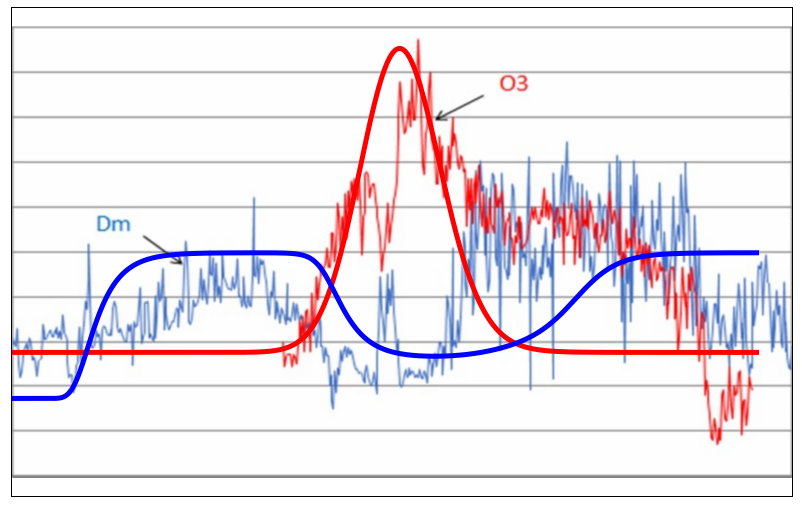

In [7]:
img = plt.imread("ozon.png")
val = 7
sizes = y[:,val,:]*np.linspace(1,64,64)
fig, ax1 = plt.subplots(figsize=(14,9))

ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax3.plot(np.linspace(0,2100,1001), sizes.mean(axis=1), color='blue', label="Dm", lw=5)
ax2.plot(np.linspace(0,2100,1001), x[:,val*25]/210, color='red', label="ОЗ", lw=5)
ax2.set_yticks([])
ax3.set_yticks([])
ax2.set_ylim(-0.001,0.0024)
ax3.set_ylim(-0.001,0.004)
ax1.set_yticks([])
ax2.set_xticks([])
ax1.imshow(img)
plt.savefig("map.jpg")